##Week 6 - Assignment
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import operator

In [48]:
g = nx.davis_southern_women_graph()

DAVIS SOUTHERN CLUB WOMEN
DATASET DAVIS

DESCRIPTION One 18×14 matrix, binary.

BACKGROUND These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

REFERENCES

Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.
List of datasets

In [49]:
women = g.graph['top']
event = g.graph['bottom']

In [50]:
#Women
print(women)
#Social Events
print(event)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


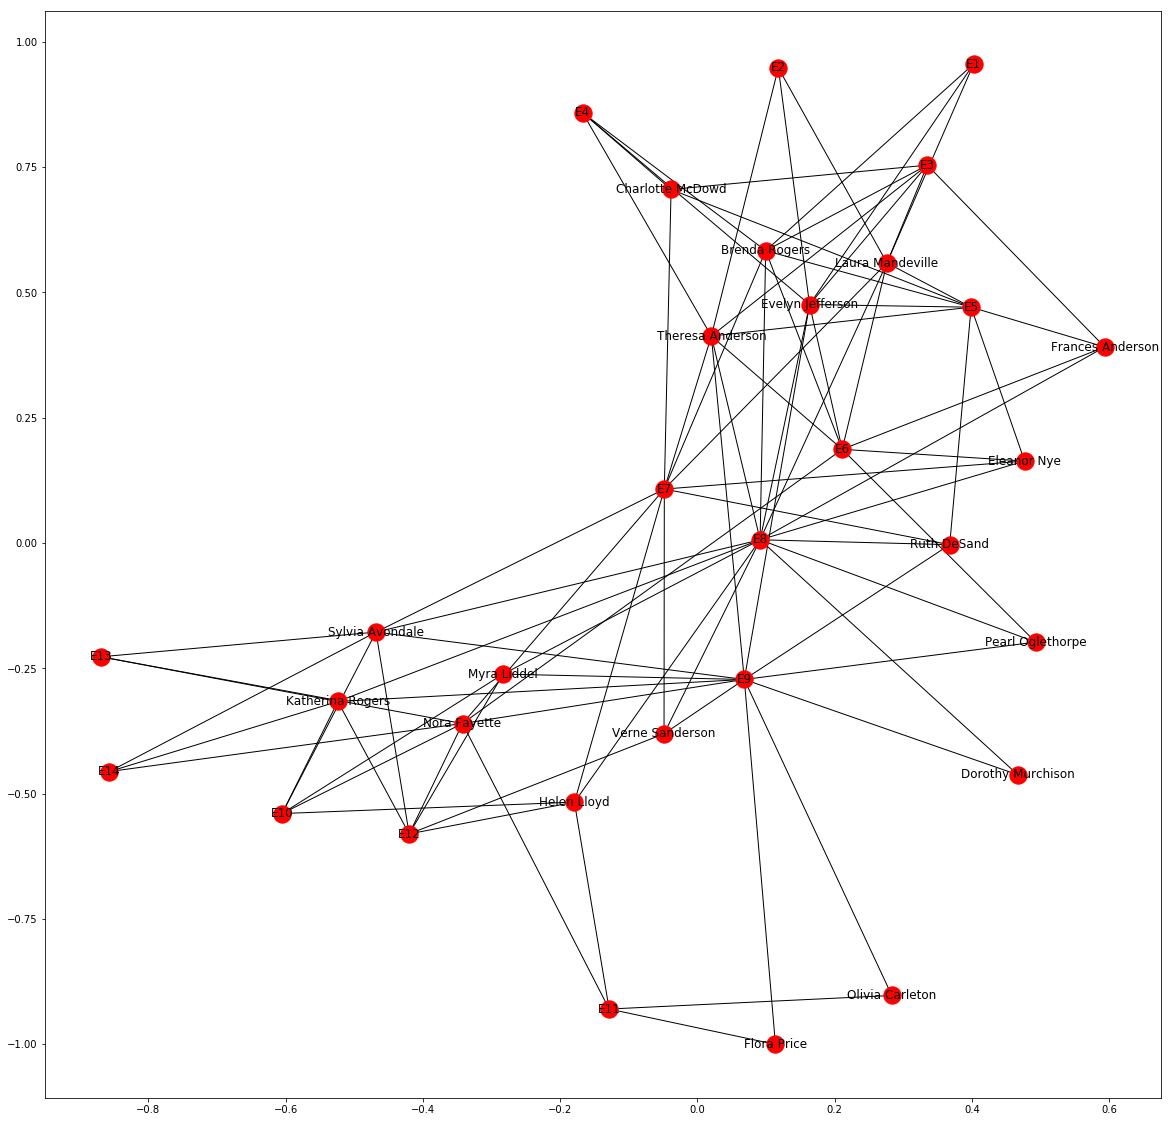

In [51]:
plt.figure(figsize = (20,20))
nx.draw_networkx(g)

In [52]:
from networkx.algorithms import bipartite as bi

In [54]:
degree_c  = pd.DataFrame()
degree_c['node'] = list(g)
degree_c['degree'] = nx.degree_centrality(g).values()
degree_c  = degree_c.sort_values('degree',ascending = False).reset_index(drop=True)
degree_c.head(10)

,node,degree
0,E8,0.451613
1,E9,0.387097
2,E7,0.322581
3,E6,0.258065
4,E5,0.258065
5,Nora Fayette,0.258065
6,Evelyn Jefferson,0.258065
7,Theresa Anderson,0.258065
8,Laura Mandeville,0.225806
9,Brenda Rogers,0.225806


Bipartite Projection : By doing this we can correct the degree to connection between the women.

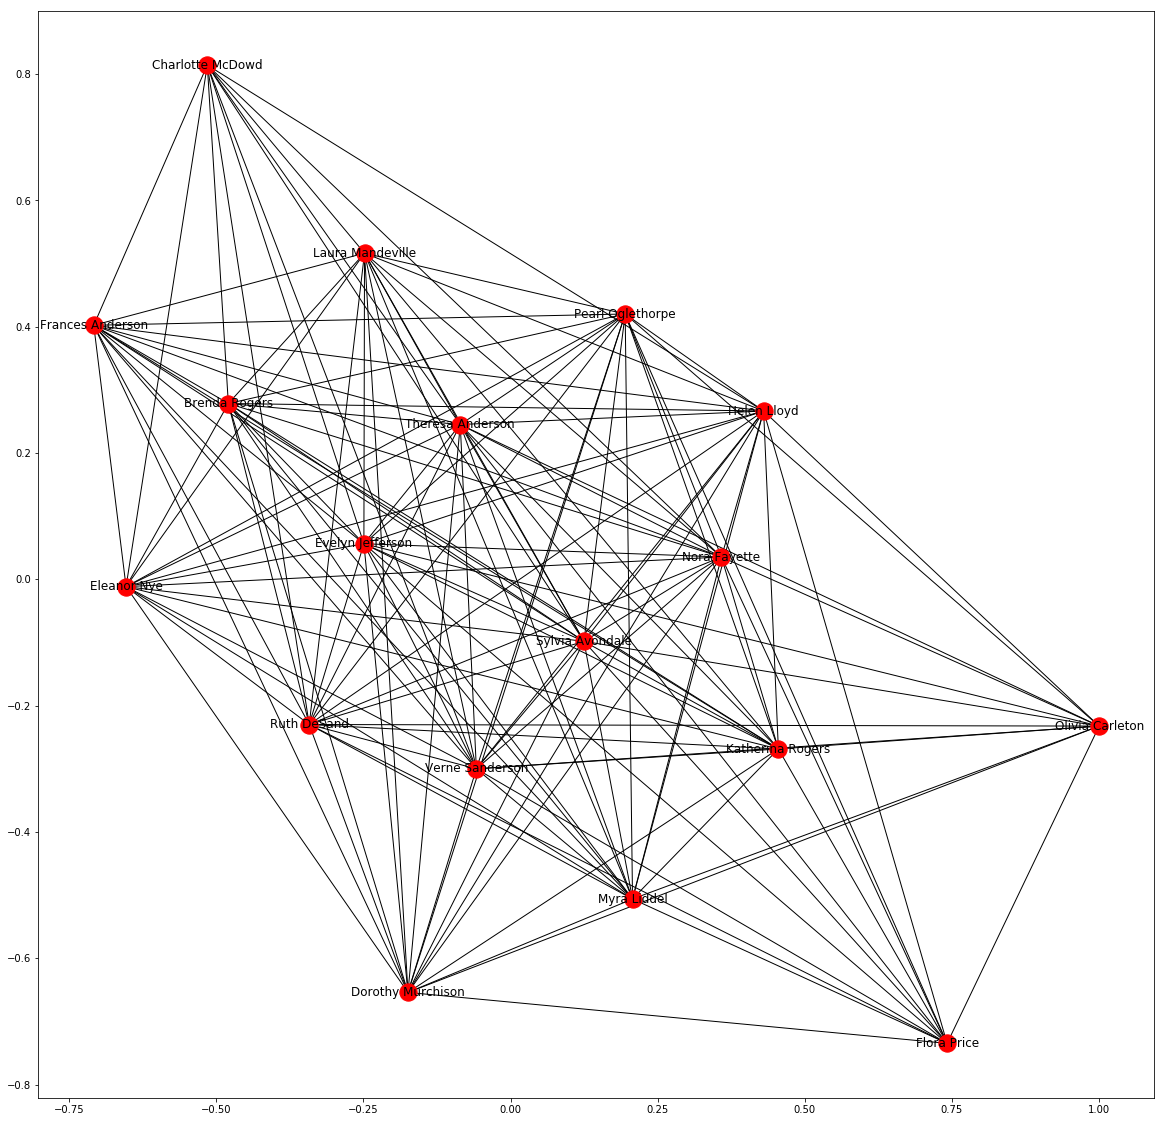

In [75]:
women2 = nx.bipartite.weighted_projected_graph(g, women)
plt.figure(figsize = (20,20))
nx.draw_networkx(women2)

In [95]:
df= pd.DataFrame()
df['node'] = list(women2)
df['degree'] = nx.degree_centrality(women2).values()
df  = df.sort_values('degree',ascending = False).reset_index(drop=True)
df.head(10)

,node,degree
0,Evelyn Jefferson,1.000000
1,Ruth DeSand,1.000000
2,Helen Lloyd,1.000000
3,Nora Fayette,1.000000
4,Sylvia Avondale,1.000000
5,Verne Sanderson,1.000000
6,Theresa Anderson,1.000000
7,Pearl Oglethorpe,0.941176
8,Myra Liddel,0.941176
9,Katherina Rogers,0.941176


In [96]:
#observe betweeness centrality among women
df['betweenness'] = nx.betweenness_centrality(women2).values()
df  = df.sort_values('betweenness',ascending = False).reset_index(drop=True)
df

,node,degree,betweenness
0,Evelyn Jefferson,1.000000,0.010122
1,Myra Liddel,0.941176,0.010122
2,Brenda Rogers,0.882353,0.010122
3,Laura Mandeville,0.882353,0.010122
4,Frances Anderson,0.882353,0.010122
5,Katherina Rogers,0.941176,0.010122
6,Helen Lloyd,1.000000,0.010122
7,Pearl Oglethorpe,0.941176,0.005348
8,Dorothy Murchison,0.941176,0.005348
9,Eleanor Nye,0.882353,0.005348


The group of women are split into 4 levels of betweenness centrality. It's interesting that Flora and Olivia have low degree centrality but are among the highest in betweenness centrality.

In [97]:
#observe closeness centrality among women
df['closeness'] = nx.closeness_centrality(women2).values()
df  = df.sort_values('closeness',ascending = False).reset_index(drop=True)
df

,node,degree,betweenness,closeness
0,Evelyn Jefferson,1.000000,0.010122,1.000000
1,Dorothy Murchison,0.941176,0.005348,1.000000
2,Nora Fayette,1.000000,0.002674,1.000000
3,Ruth DeSand,1.000000,0.002674,1.000000
4,Verne Sanderson,1.000000,0.002674,1.000000
5,Eleanor Nye,0.882353,0.005348,1.000000
6,Brenda Rogers,0.882353,0.010122,1.000000
7,Pearl Oglethorpe,0.941176,0.005348,0.944444
8,Olivia Carleton,0.705882,0.005348,0.944444
9,Theresa Anderson,1.000000,0.002674,0.944444


Evelyn Jefferson seems to be the leader of the group of women as she has the highest centrality in degree, betweenness and closeness. Lets see look at how influencial she is among the group.

In [98]:
#observe eigenvector among women
df['eigen'] = nx.eigenvector_centrality(women2).values()
df  = df.sort_values('eigen',ascending = False).reset_index(drop=True)
df

,node,degree,betweenness,closeness,eigen
0,Evelyn Jefferson,1.000000,0.010122,1.000000,0.253524
1,Nora Fayette,1.000000,0.002674,1.000000,0.253524
2,Olivia Carleton,0.705882,0.005348,0.944444,0.253524
3,Laura Mandeville,0.882353,0.010122,0.894737,0.253524
4,Myra Liddel,0.941176,0.010122,0.894737,0.253524
5,Katherina Rogers,0.941176,0.010122,0.894737,0.253524
6,Theresa Anderson,1.000000,0.002674,0.944444,0.253524
7,Pearl Oglethorpe,0.941176,0.005348,0.944444,0.243157
8,Sylvia Avondale,1.000000,0.000000,0.944444,0.243157
9,Helen Lloyd,1.000000,0.010122,0.894737,0.243157


Just as a I thought, Evelyn has the highest eigenvector centrality. Sylvia Avondale and Flora Price stands out also as she has 0 betweenness centrality but has high eigenvector centrality.

Conclusion:

From the event attenders, there are several women that are more active than the others but we can see from the chart some stand out more. Evelyn Jefferson looks like attends many of the events and seems to be connected heavily with the rest of the women. Helen Lloyd has high degree and betweenness but low closness and eigenvector, making her not such an influencial figure among the group.Olivia Carleton has a very high eigenvector, buta low degree and betweenness centrality, making her one of the most influencial among the group to not attend as many events. Overall it seems that it's a very interconnected gropu and only a few stand out in centrality among the group.